### Fake News Detection with TF-IDF using Naive Bayes and Logistic Regression

Here the text data from [kaggle](https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification) which has news text and labels indicating if the news is fake. TDF-IDF Vectorizer is used before using Naive Bayes and Logistic Regression Models to classify the news. The label 0  says it is fake and 1 means it is real.

#### Importing the required libraries

In [29]:
import pandas as pd 
import nltk
from wordcloud import WordCloud
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# nltk.download('stopwords')
# nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report

#### Importing the data

In [11]:
data = pd.read_csv("data/WELFake_Dataset.csv", usecols=['text','label'])
data.head()

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


#### Prepating the Text Data

We will mainly use `Tokenizer` and `TF-IDF Vectorizer` as a preparatory step for the text data. 

In [12]:
data['text'] = data['text'].astype(str) # word_tokenize works only on string data
data['text'] = data['text'].str.lower()

#### Word Cloud for Fake News

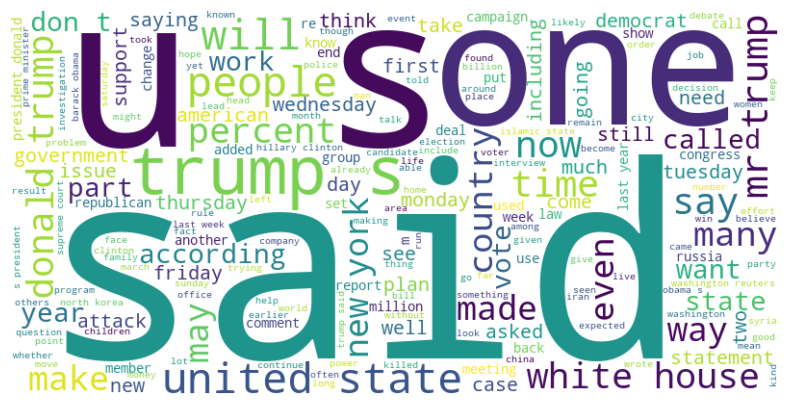

In [13]:
# Combine all text into one string
all_text = " ".join(data[(data['label'] == 0)]['text'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
#### Word Cloud for Real News

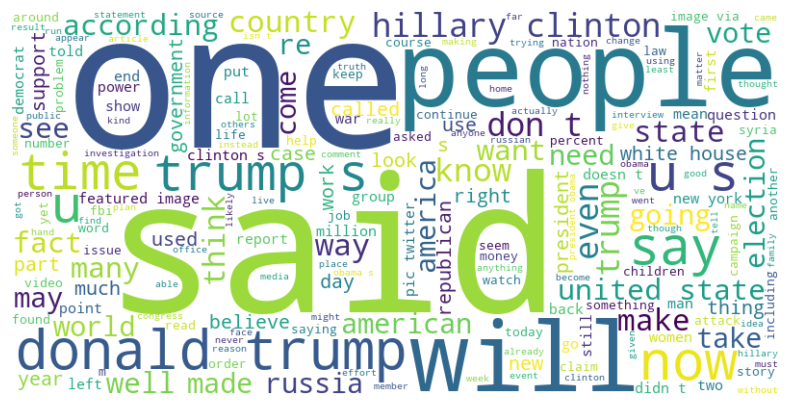

In [15]:
# Combine all text into one string
all_text = " ".join(data[(data['label'] == 1)]['text'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Creating Train-Test Split

In [16]:
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Vectorization of Text Data

Before sending the data to predictive model, the texts should be converted into numeric format i.e a matrix of numbers. Out of several methods of vectorization, TF-IDF Vectorization is used here
TF-IDF Vectorization is used here. It is composed of two measures 
1. TF - Term Frequency - Measures the number of times a word appears in the document (Number of times a wor appears out of all the words in a sentence)
2. IDF - Inverse Document Frequency - Measures the rarity of the word in the entire corpus (Inverse of number of sentences containing the word out of all sentences)

`TF-IDF = TF x IDF`  (which is Frequency in a sentence x Rarity across sentences)

>TF-IDF for a word will be high if a word is frequent in a sentence but rare in the entire list of sentences.


As there are two columns of sentences, `ColumnTransformer` is used to preserve the information about which column the vector came from.

#### Vectorization

In [17]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit and transform the training data
X_test_tfidf = vectorizer.transform(X_test)        # Only transform the test data

#### Model Fitting

In [18]:
model = MultinomialNB()    
model.fit(X_train_tfidf, y_train)

MultinomialNB()

#### Predictions

In [19]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)


In [21]:
print(f"\nAccuracy: {accuracy}")
print("\nClassification Report:\n", report)


Accuracy: 0.8616482983295211

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      7006
           1       0.87      0.86      0.86      7421

    accuracy                           0.86     14427
   macro avg       0.86      0.86      0.86     14427
weighted avg       0.86      0.86      0.86     14427



#### Fitting Logistic Regression Model

In [22]:
model = LogisticRegression()    
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

#### Results

In [25]:
print(f"\nAccuracy: {accuracy}")
print("\nClassification Report:\n", report)


Accuracy: 0.9414985790531643

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      7006
           1       0.93      0.95      0.94      7421

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427



Text(113.9222222222222, 0.5, 'true value')

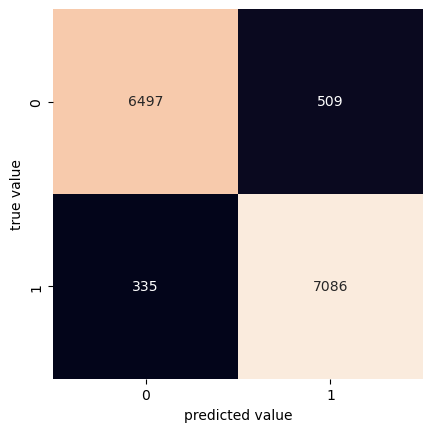

In [30]:
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False) 
plt.xlabel('predicted value')
plt.ylabel('true value')